## 1.Import necessary librarieas

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

## 2.Reading the file

In [94]:
startup_50 = pd.read_csv('50_startups.csv')
startup_50


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## 3.Initial investigation

In [95]:
startup_50.shape

(50, 5)

In [96]:
startup_50.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [97]:
startup_50.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [98]:
startup_50.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

## 4.Assumption cheak

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

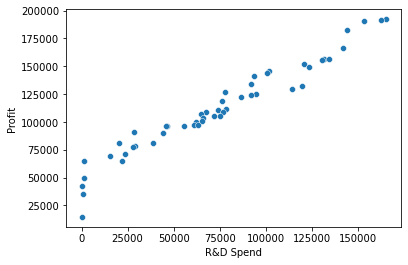

In [99]:
sns.scatterplot(x='R&D Spend',y='Profit',data=startup_50)

<AxesSubplot:xlabel='Administration', ylabel='Profit'>

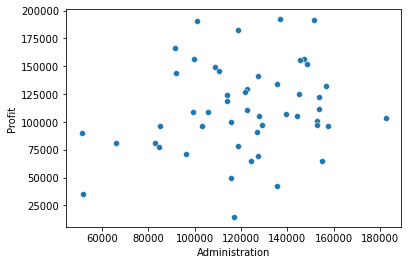

In [100]:
sns.scatterplot(x='Administration',y='Profit',data=startup_50)

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

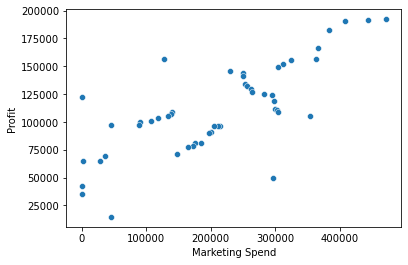

In [101]:
sns.scatterplot(x='Marketing Spend',y='Profit',data=startup_50)

<AxesSubplot:xlabel='State', ylabel='Profit'>

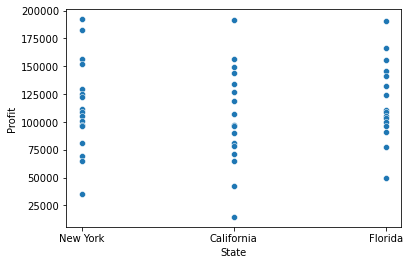

In [102]:
sns.scatterplot(x='State',y='Profit',data=startup_50)

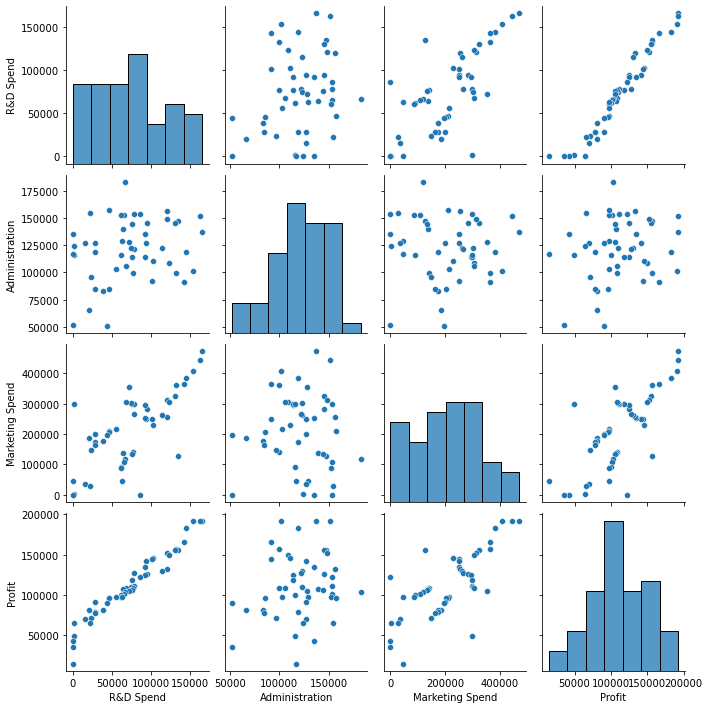

In [103]:
sns.pairplot(data=startup_50)

In [104]:
startup_50.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


## 5.Data preparation

In [105]:
startup_50.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [106]:
startup_50.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

## 6.Data processing

In [107]:
le = LabelEncoder()
startup_50['encoded_State'] = le.fit_transform(startup_50['State'])

In [108]:
del startup_50['State']

In [109]:
startup_50

,R&D Spend,Administration,Marketing Spend,Profit,encoded_State
0,165349.20,136897.80,471784.10,192261.83,2
1,162597.70,151377.59,443898.53,191792.06,0
2,153441.51,101145.55,407934.54,191050.39,1
3,144372.41,118671.85,383199.62,182901.99,2
4,142107.34,91391.77,366168.42,166187.94,1
5,131876.90,99814.71,362861.36,156991.12,2
6,134615.46,147198.87,127716.82,156122.51,0
7,130298.13,145530.06,323876.68,155752.60,1
8,120542.52,148718.95,311613.29,152211.77,2
9,123334.88,108679.17,304981.62,149759.96,0


In [110]:
startup_50_transformed = StandardScaler()
startup_50_transformed = startup_50_transformed.fit_transform(startup_50)

In [111]:
startup_50_transformed

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
         2.01120333e+00,  1.21267813e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
         1.99942997e+00, -1.21267813e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         1.98084225e+00,  0.00000000e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
         1.77662724e+00,  1.21267813e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         1.35774012e+00,  0.00000000e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
         1.12724963e+00,  1.21267813e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
         1.10548055e+00, -1.21267813e+00],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         1.09620987e+00,  0.00000000e+00],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01,
         1.00746967e+00,  1.21267813e+00],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01,
         9.46022467e-01

In [112]:
startup_50.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'encoded_State'],
      dtype='object')

In [113]:
startup_50_transformed = pd.DataFrame(data=startup_50_transformed,columns=[['R&D Spend', 'Administration', 'Marketing Spend', 'Profit','encoded_State']])

In [114]:
startup_50_transformed

,R&D Spend,Administration,Marketing Spend,Profit,encoded_State
0,2.016411,0.560753,2.153943,2.011203,1.212678
1,1.955860,1.082807,1.923600,1.999430,-1.212678
2,1.754364,-0.728257,1.626528,1.980842,0.000000
3,1.554784,-0.096365,1.422210,1.776627,1.212678
4,1.504937,-1.079919,1.281528,1.357740,0.000000
5,1.279800,-0.776239,1.254210,1.127250,1.212678
6,1.340066,0.932147,-0.688150,1.105481,-1.212678
7,1.245057,0.871980,0.932186,1.096210,0.000000
8,1.030369,0.986952,0.830887,1.007470,1.212678
9,1.091819,-0.456640,0.776107,0.946022,-1.212678


## 7.Model building

In [115]:
X = startup_50_transformed[['R&D Spend', 'Administration', 'Marketing Spend','encoded_State']]
y=startup_50_transformed[['Profit']]

In [116]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((40, 4), (10, 4), (40, 1), (10, 1))

## 8.Model training

In [117]:
startup_50_linear_model = LinearRegression()
startup_50_linear_model.fit(X_train,y_train)

LinearRegression()

## 9.Model testing

In [118]:
y_pred = startup_50_linear_model.predict(X_test)
y_pred

array([[-0.27680305],
       [-0.95634452],
       [ 1.54636779],
       [-0.25279709],
       [ 0.04091747],
       [ 0.34070142],
       [-1.43804449],
       [-1.26067818],
       [ 0.09871949],
       [ 1.13579464]])

In [119]:
y_pred.shape

(10, 1)

## 10.Model evaluation

In [120]:
print("MSE      :",round(mean_squared_error(y_test,y_pred),4))
print("R2 Score :",round(r2_score(y_test,y_pred),4))


MSE      : 0.0448
R2 Score : 0.9561


### build some other model diffrient parameter

In [121]:
X1 = startup_50_transformed[['R&D Spend', 'Administration', 'Marketing Spend']]
y=startup_50_transformed[['Profit']]

In [122]:
X1

,R&D Spend,Administration,Marketing Spend
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528
5,1.279800,-0.776239,1.254210
6,1.340066,0.932147,-0.688150
7,1.245057,0.871980,0.932186
8,1.030369,0.986952,0.830887
9,1.091819,-0.456640,0.776107


In [123]:
X1_train,X1_test,y_train,y_test = train_test_split(X1,y,test_size=0.20)
X1_train.shape,X1_test.shape,y_train.shape,y_test.shape 

((40, 3), (10, 3), (40, 1), (10, 1))

In [124]:
startup_50_linear_model1 = LinearRegression()
startup_50_linear_model1.fit(X1_train,y_train)

LinearRegression()

In [125]:
y_pred1 = startup_50_linear_model1.predict(X1_test)
y_pred1

array([[ 0.05297915],
       [ 0.39455468],
       [ 0.04837175],
       [-1.38352195],
       [ 1.21628987],
       [-0.31873729],
       [-0.38758011],
       [ 0.87621724],
       [ 1.56187031],
       [-0.59343483]])

In [126]:
print("R2 Score :",round(r2_score(y_test,y_pred1),4))
print("MSE      :",round(mean_squared_error(y_test,y_pred1),4))

R2 Score : 0.9356
MSE      : 0.041


## 11.Model depolyment

In [129]:
from pickle import dump

In [130]:
dump(startup_50_linear_model,open("startup_50_linear_model.pkl",'wb'))

In [131]:
dump(startup_50_linear_model1,open("startup_50_linear_model-1.pkl",'wb'))

In [133]:
from pickle import load

In [134]:
loaded_model_1 = load(open("startup_50_linear_model.pkl",'rb'))

In [135]:
loaded_model_2 = load(open("startup_50_linear_model-1.pkl",'rb'))

In [136]:
loaded_model_1.predict(X_test)

array([[-0.27680305],
       [-0.95634452],
       [ 1.54636779],
       [-0.25279709],
       [ 0.04091747],
       [ 0.34070142],
       [-1.43804449],
       [-1.26067818],
       [ 0.09871949],
       [ 1.13579464]])

In [137]:
loaded_model_2.predict(X1_test)

array([[ 0.05297915],
       [ 0.39455468],
       [ 0.04837175],
       [-1.38352195],
       [ 1.21628987],
       [-0.31873729],
       [-0.38758011],
       [ 0.87621724],
       [ 1.56187031],
       [-0.59343483]])

# ------------------------------------------------------------------------------------------------------------